In [0]:
#Using PCA for feature extraction and KNN for classification

In [1]:
#The below are wrapper functions used to connect to your drive and this needs to be run once (i.e. once every new session or possibily refreshes for every 24 hours)

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Authentication for your google drive
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()

# Authentication for the wrapper libraries  or possibily refreshes for every 24 hours)

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


gpg: keybox '/tmp/tmp2b7hkfxd/pubring.gpg' created
gpg: /tmp/tmp2b7hkfxd/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [2]:
!mkdir -p MyDrive
!google-drive-ocamlfuse MyDrive
% cd MyDrive/Colab-docs/DigitRecognizer

/content/MyDrive/Colab-docs/DigitRecognizer


In [0]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [0]:
input_data = pd.read_csv('train.csv')

In [5]:
input_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


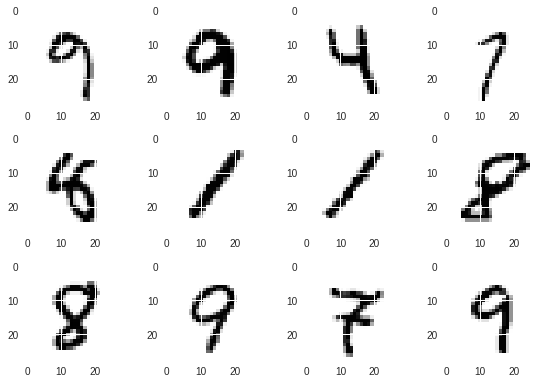

In [6]:
c_data = input_data.drop(['label'], axis=1).values

import matplotlib.pyplot as plt
import random

for i in range(0,3):
    for j in range(0,4):
        index = random.randrange(0, len(c_data))
        plot = plt.subplot2grid((3, 4), (i, j))
        plot.imshow(c_data[index].reshape(28,28))

plt.tight_layout()
plt.show()

In [0]:
def KNN_PCA(train, test, label, nf):
    print("Converting training to Matrix")
    X_train = train

    print("Fitting PCA")
    pca = PCA(n_components=100).fit(X_train)

    print("----- Transforming training ------ ")
    X_train_reduced = pca.transform(X_train)

    print("KNN with k=10")
    knn = KNeighborsClassifier(n_neighbors=10, algorithm="kd_tree")
    print(knn.fit(X_train_reduced, label))
    
    print("Reducing test to %d components" % nf)
    X_test_reduced = pca.transform(test)
    
    print("Predicting numbers")
    predictions = knn.predict(X_test_reduced)
    print("prediction Done")
    
    return predictions
    

    
train = input_data.iloc[0:,1:]
label = input_data['label']
test = pd.read_csv('test.csv')
predicitions = KNN_PCA(train, test, label, 100)


In [9]:
df = pd.DataFrame(predicitions)
df.index.name = 'ImageId'
df.index+=1
df.columns=['Label']
df.head()

,Label
1,2
2,0
3,9
4,9
5,3


28000


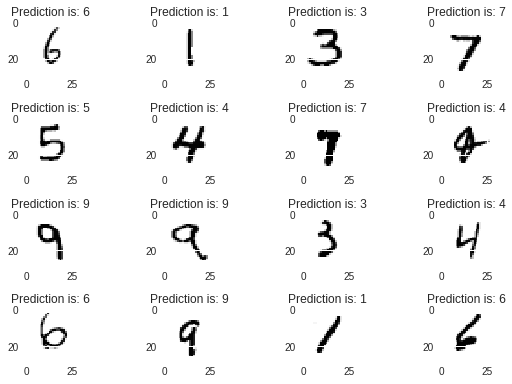

In [16]:
print(len(predicitions))
a = 4
b = 4
c_data = test.values
for i in range(0,a):
    for j in range(0,b):
        index = random.randrange(0, len(c_data))
        plot = plt.subplot2grid((a, b), (i, j))
        plot.set_title("Prediction is: " + str(predicitions[index]))
        plot.imshow(c_data[index].reshape(28,28))
        
plt.tight_layout()
plt.show()